In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, SimpleRNN, Reshape, GRU, Attention, Dot, UpSampling1D, Input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\'

In [3]:
train_folder = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\training_set'
test_folder = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\test_set'

Delete NaN Row

In [4]:
# def delete_nan_row(file_path):
#     df = pd.read_csv(file_path)

#     df = df.dropna()

#     df.to_csv(file_path, index=False)

# file_list = os.listdir(folder_path)

# for file_name in file_list:
#     if file_name.endswith('.csv'):
#         file_path = os.path.join(folder_path, file_name)
#         delete_nan_row(file_path)

# print("Proses selesai.")

Test Train Split

In [5]:
record_names = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']

for record_name in record_names:
    df = pd.read_csv(f'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\record_{record_name}.csv')
    df.head()

    unique_labels = df.iloc[:, -1].unique()
    print(record_name, unique_labels)

100 ['N' 'A' 'V']
101 ['N' 'A']
102 ['V' 'N']
103 ['N' 'A']
104 ['N' 'V']
105 ['N' 'V']
106 ['N' 'V']
107 ['V']
108 ['N' 'V' 'A' 'F']
109 ['L' 'F' 'V']
111 ['L' 'V']
112 ['N' 'A']
113 ['N' 'a']
114 ['N' 'V' 'J' 'F' 'A']
115 ['N']
116 ['N' 'V' 'A']
117 ['N' 'A']
118 ['R' 'V' 'A']
119 ['V' 'N']
121 ['N' 'A' 'V']
122 ['N']
123 ['N']
124 ['R' 'J' 'V' 'F' 'A']
200 ['V' 'N' 'A' 'F']
201 ['N' 'a' 'V' 'A' 'J' 'F']
202 ['N' 'V' 'A' 'a' 'F']
203 ['N' 'V' 'a']
205 ['N' 'V' 'F' 'A']
207 ['V' 'R' 'L' 'E' 'A']
208 ['V' 'F' 'N']
209 ['N' 'A' 'V']
210 ['N' 'F' 'V' 'a' 'E']
212 ['R' 'N']
213 ['N' 'F' 'A' 'V' 'a']
214 ['L' 'V' 'F']
215 ['N' 'V' 'A']
217 ['V' 'N']
219 ['N' 'V' 'F' 'A']
220 ['N' 'A']
221 ['N' 'V']
222 ['N' 'A' 'J']
223 ['N' 'V' 'A' 'F' 'a']
228 ['N' 'V' 'A']
230 ['N' 'V']
231 ['R' 'N' 'A']
232 ['R' 'A']
233 ['V' 'N' 'A' 'F']
234 ['N' 'J']


Split Train and Test Phase

In [6]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path, header=None)

    dfs.append(df)

combined_data = pd.concat(dfs, ignore_index=True)

X = combined_data.iloc[:, :-1] 
y = combined_data.iloc[:, -1]

In [7]:
y.unique()

array(['A', 'N', 'V', 'F', 'L', 'a', 'J', 'R', 'E'], dtype=object)

In [8]:
y = LabelEncoder().fit_transform(y)
y

array([0, 5, 5, ..., 5, 5, 5])

In [10]:
# X = StandardScaler().fit_transform(X)
# X

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Phase

In [12]:
labels = ['A', 'N', 'V', 'F', 'L', 'a', 'J', 'R', 'E']

num_classes = len(labels)
input_shape = (256, 1)
epochs = 10
batch_size = 32

In [13]:
shap.initjs()

In [14]:
def plot_training_history(history):
    # Plot training history
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

#1 CLSTM

In [15]:
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # LSTM layer for classification
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [16]:
cnn_lstm = create_cnn_lstm_model(input_shape, num_classes)
cnn_lstm.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 126, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 122, 64)           10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 61, 64)            0         
 g1D)                                                            
                                                                 
 reshape (Reshape)           (None, 61, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 61, 50)          

Epoch 1/20


801/801 [==============================] - 43s 49ms/step - loss: 0.7414 - accuracy: 0.7527 - val_loss: 0.3417 - val_accuracy: 0.8969
Epoch 2/20
801/801 [==============================] - 43s 53ms/step - loss: 0.3017 - accuracy: 0.9081 - val_loss: 0.2982 - val_accuracy: 0.9115
Epoch 3/20
801/801 [==============================] - 43s 53ms/step - loss: 0.2216 - accuracy: 0.9336 - val_loss: 0.2012 - val_accuracy: 0.9436
Epoch 4/20
801/801 [==============================] - 35s 44ms/step - loss: 0.1787 - accuracy: 0.9468 - val_loss: 0.2079 - val_accuracy: 0.9422
Epoch 5/20
801/801 [==============================] - 39s 49ms/step - loss: 0.1537 - accuracy: 0.9549 - val_loss: 0.1517 - val_accuracy: 0.9550
Epoch 6/20
801/801 [==============================] - 43s 53ms/step - loss: 0.1389 - accuracy: 0.9579 - val_loss: 0.1406 - val_accuracy: 0.9600
Epoch 7/20
801/801 [==============================] - 37s 46ms/step - loss: 0.1256 - accuracy: 0.9614 - val_loss: 0.1408 - val_accurac

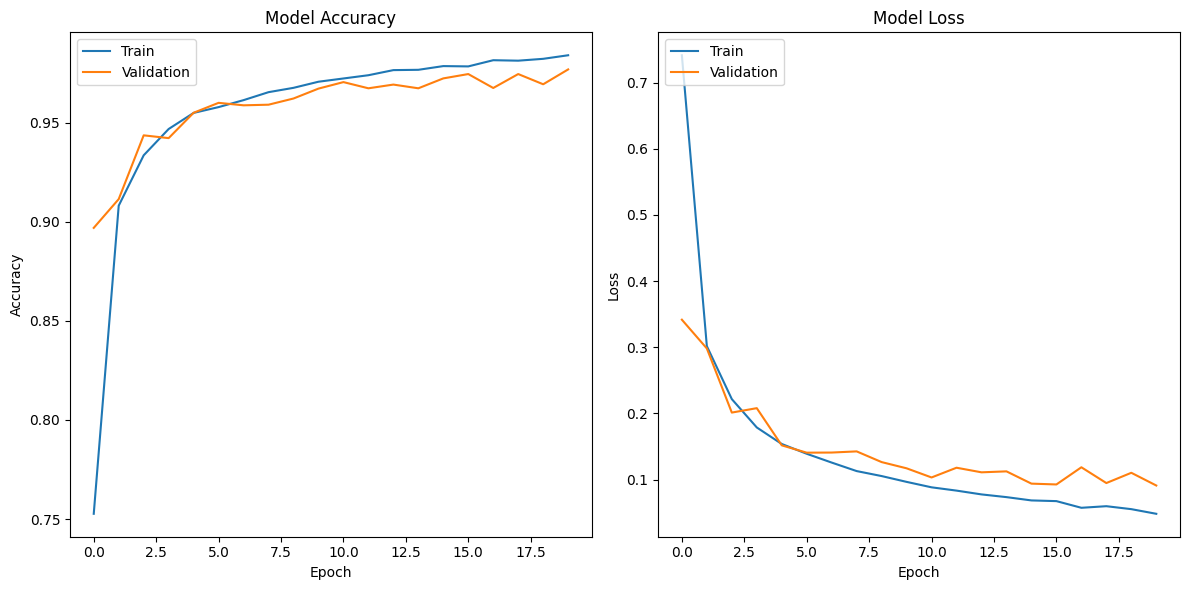

In [17]:
history = cnn_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

In [18]:
y_pred = cnn_lstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)


201/201 [==============================] - 3s 12ms/step
Accuracy: 0.9769
Confusion Matrix:
[[ 453    0    0    0    1   30    1    1    0]
 [   0   21    0    0    0    0    0    1    0]
 [   0    0  133    0    0   14    0   13    0]
 [   0    0    0   17    0    1    0    0    0]
 [   0    0    0    0 1616    3    0    7    0]
 [   9    0    5    0    4 1803    4    9    0]
 [   3    0    0    1    0    3 1254    1    0]
 [   2    0   13    0    3   12    1  953    0]
 [   2    0    0    0    0    2    0    2    6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       486
           1       1.00      0.95      0.98        22
           2       0.88      0.83      0.86       160
           3       0.94      0.94      0.94        18
           4       1.00      0.99      0.99      1626
           5       0.97      0.98      0.97      1834
           6       1.00      0.99      0.99      1262
           7       0

In [19]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9768
Sensitivity (Recall): 0.9769
F1 Score: 0.9766


#2 CGRU

In [21]:
def create_cnn_gru_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # GRU layer for classification
    model.add(GRU(50, return_sequences=True))
    model.add(GRU(50))

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [22]:
cnn_gru = create_cnn_gru_model(input_shape, num_classes)
cnn_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 252, 32)           192       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 126, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 122, 64)           10304     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 61, 64)            0         
 g1D)                                                            
                                                                 
 reshape_1 (Reshape)         (None, 61, 64)            0         
                                                                 
 gru (GRU)                   (None, 61, 50)           

Epoch 1/20
801/801 [==============================] - 44s 50ms/step - loss: 0.8514 - accuracy: 0.7113 - val_loss: 0.3463 - val_accuracy: 0.8896
Epoch 2/20
801/801 [==============================] - 43s 53ms/step - loss: 0.2939 - accuracy: 0.9088 - val_loss: 0.2392 - val_accuracy: 0.9200
Epoch 3/20
801/801 [==============================] - 39s 48ms/step - loss: 0.2044 - accuracy: 0.9392 - val_loss: 0.2076 - val_accuracy: 0.9394
Epoch 4/20
801/801 [==============================] - 39s 48ms/step - loss: 0.1627 - accuracy: 0.9516 - val_loss: 0.1564 - val_accuracy: 0.9553
Epoch 5/20
801/801 [==============================] - 44s 55ms/step - loss: 0.1362 - accuracy: 0.9592 - val_loss: 0.1392 - val_accuracy: 0.9597
Epoch 6/20
801/801 [==============================] - 36s 45ms/step - loss: 0.1250 - accuracy: 0.9614 - val_loss: 0.1328 - val_accuracy: 0.9588
Epoch 7/20
801/801 [==============================] - 38s 48ms/step - loss: 0.1078 - accuracy: 0.9669 - val_loss: 0.1181 - val_accuracy:

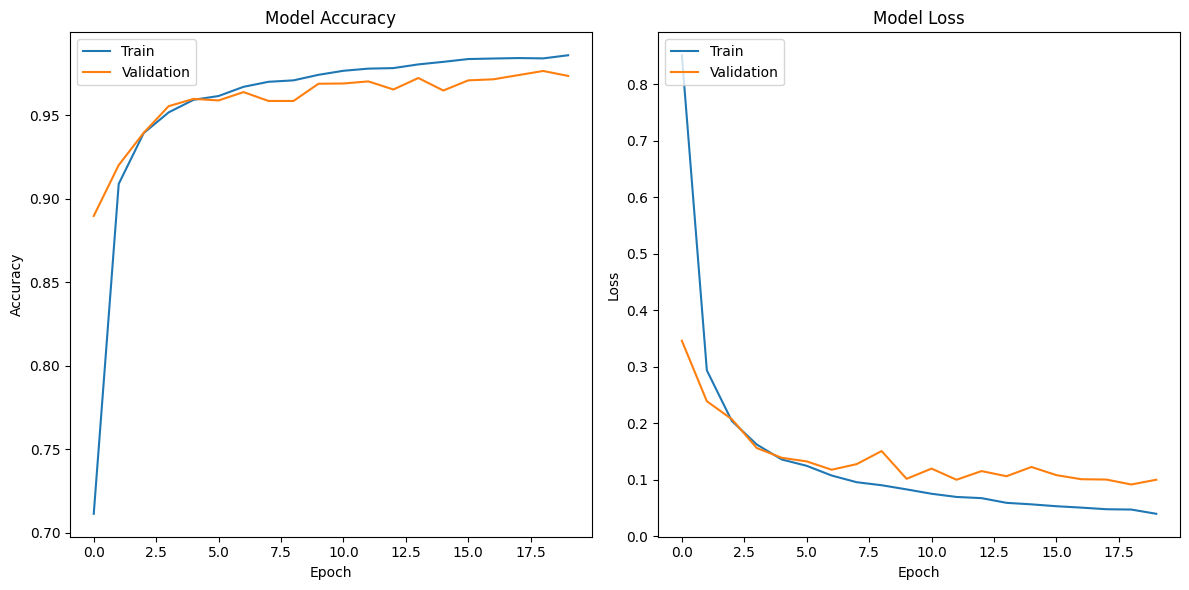

In [23]:
history = cnn_gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

In [24]:
y_pred = cnn_gru.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

201/201 [==============================] - 3s 12ms/step
Accuracy: 0.9735
Confusion Matrix:
[[ 445    0    3    0    1   33    2    2    0]
 [   0   20    0    0    1    0    0    1    0]
 [   1    0  131    0    0    9    1   18    0]
 [   1    0    0   16    0    1    0    0    0]
 [   1    0    0    0 1610    2    0   13    0]
 [  16    0    8    0    2 1799    2    7    0]
 [   4    0    0    0    0    3 1254    1    0]
 [   1    0    8    0    4   10    4  956    1]
 [   2    0    0    0    0    3    1    3    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       486
           1       1.00      0.91      0.95        22
           2       0.87      0.82      0.85       160
           3       1.00      0.89      0.94        18
           4       1.00      0.99      0.99      1626
           5       0.97      0.98      0.97      1834
           6       0.99      0.99      0.99      1262
           7       0

In [25]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9731
Sensitivity (Recall): 0.9735
F1 Score: 0.9729


#3 CRNN

In [26]:
def create_cnn_rnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # RNN layer for classification
    model.add(SimpleRNN(50, return_sequences=True))
    model.add(SimpleRNN(50))

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [27]:
cnn_rnn = create_cnn_rnn_model(input_shape, num_classes)
cnn_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 252, 32)           192       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 126, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 122, 64)           10304     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 61, 64)            0         
 g1D)                                                            
                                                                 
 reshape_2 (Reshape)         (None, 61, 64)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 61, 50)           

Epoch 1/20
801/801 [==============================] - 23s 26ms/step - loss: 0.5153 - accuracy: 0.8423 - val_loss: 0.3780 - val_accuracy: 0.8901
Epoch 2/20
801/801 [==============================] - 21s 26ms/step - loss: 0.2820 - accuracy: 0.9151 - val_loss: 0.2426 - val_accuracy: 0.9344
Epoch 3/20
801/801 [==============================] - 21s 27ms/step - loss: 0.2350 - accuracy: 0.9301 - val_loss: 0.1847 - val_accuracy: 0.9441
Epoch 4/20
801/801 [==============================] - 19s 24ms/step - loss: 0.2071 - accuracy: 0.9389 - val_loss: 0.2148 - val_accuracy: 0.9360
Epoch 5/20
801/801 [==============================] - 19s 24ms/step - loss: 0.1887 - accuracy: 0.9425 - val_loss: 0.1602 - val_accuracy: 0.9535
Epoch 6/20
801/801 [==============================] - 19s 24ms/step - loss: 0.1756 - accuracy: 0.9479 - val_loss: 0.1872 - val_accuracy: 0.9453
Epoch 7/20
801/801 [==============================] - 21s 26ms/step - loss: 0.1686 - accuracy: 0.9485 - val_loss: 0.2725 - val_accuracy:

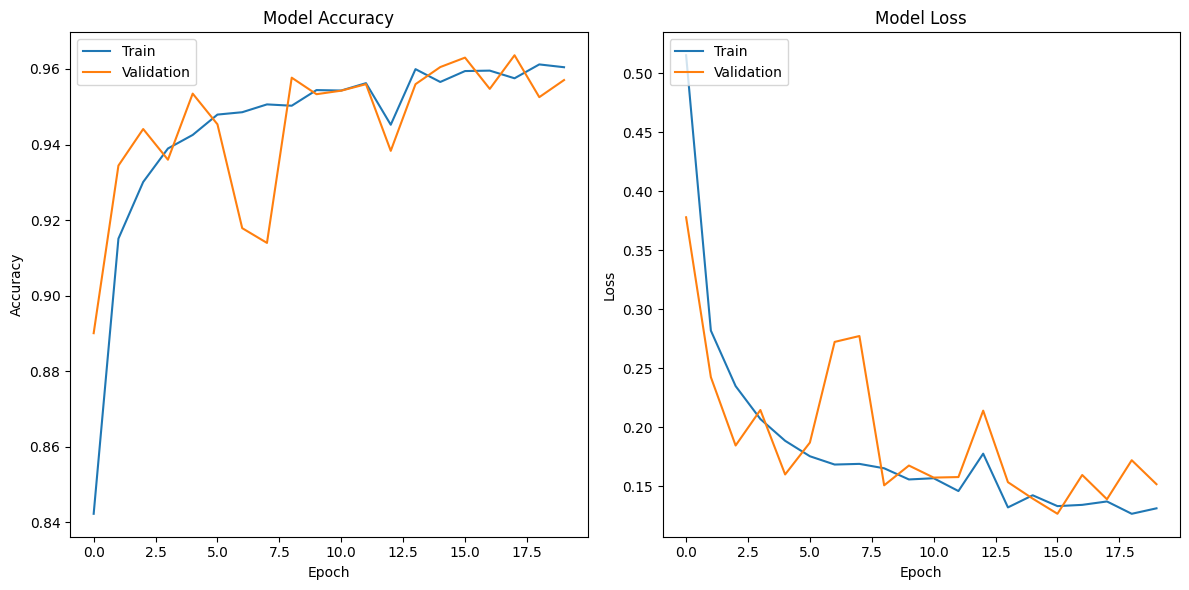

In [28]:
history = cnn_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

In [29]:
y_pred = cnn_rnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

201/201 [==============================] - 2s 9ms/step
Accuracy: 0.9571
Confusion Matrix:
[[ 423    1    1    1    3   51    5    1    0]
 [   0   21    0    0    0    1    0    0    0]
 [   0    0  135    0    0   14    0   11    0]
 [   0    0    0   10    0    2    6    0    0]
 [   1    1    0    0 1610    5    1    8    0]
 [  23    0    6    4    2 1757   20   22    0]
 [   9    1    0    0    0    5 1243    3    1]
 [   2    1   15    0   16   18    4  928    0]
 [   2    0    0    0    0    5    0    3    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       486
           1       0.84      0.95      0.89        22
           2       0.86      0.84      0.85       160
           3       0.67      0.56      0.61        18
           4       0.99      0.99      0.99      1626
           5       0.95      0.96      0.95      1834
           6       0.97      0.98      0.98      1262
           7       0.

In [30]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9563
Sensitivity (Recall): 0.9571
F1 Score: 0.9563


#4 CAttention

In [31]:
# def create_cnn_attention_model(input_shape, num_classes):
#     model = Sequential()

#     # Convolutional layers for feature extraction
#     model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))

#     model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))

#     # Reshape the output to 2D
#     model.add(Reshape((-1, model.output_shape[-1])))

#     # Split the output into query and value
#     query_value = Dense(64, activation='relu')(model.output)

#     # Attention layer (manual implementation)
#     query = Dense(64, activation='relu')(query_value)
#     value = Dense(64, activation='relu')(query_value)
#     attention_scores = Attention()([query, value])

#     # Weighted sum of value using attention scores
#     attended_value = Dot(axes=(1, 1))([attention_scores, value])

#     # GRU layer for classification
#     lstm_output = LSTM(50, return_sequences=True)(attended_value)
#     lstm_output = LSTM(50)(lstm_output)

#     # Fully connected layer
#     dense_output = Dense(128, activation='relu')(lstm_output)
#     output = Dense(num_classes, activation='softmax')(dense_output)

#     # Create the model
#     model = Model(inputs=model.input, outputs=output)

#     # Compile the model
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     return model


In [32]:
# cnn_attention = create_cnn_attention_model(input_shape, num_classes)
# cnn_attention.summary()

In [33]:
# history = cnn_attention.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# plot_training_history(history)

In [34]:
# y_pred = cnn_attention.predict(X_test)
# y_pred_classes = y_pred.argmax(axis=-1)

# # Menghitung dan mencetak akurasi
# accuracy = accuracy_score(y_test, y_pred_classes)
# print(f'Accuracy: {accuracy:.4f}')

# # Menghitung dan mencetak confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_classes)
# print('Confusion Matrix:')
# print(conf_matrix)

# # Menghitung dan mencetak classification report
# class_report = classification_report(y_test, y_pred_classes)
# print('Classification Report:')
# print(class_report)

In [35]:
# # Menghitung dan mencetak precision
# precision = precision_score(y_test, y_pred_classes, average='weighted')
# print(f'Precision: {precision:.4f}')

# # Menghitung dan mencetak sensitivity (recall)
# sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
# print(f'Sensitivity (Recall): {sensitivity:.4f}')

# # Menghitung dan mencetak F1 Score
# f1 = f1_score(y_test, y_pred_classes, average='weighted')
# print(f'F1 Score: {f1:.4f}')

SHAP